In [28]:
import numpy as np
import matplotlib.pyplot as plt
!pip install networkx

In [29]:
path_to_dataset = '/Users/sachinta/GitProjects/AMATH-482/Homework Assignments/Homework 4/house-votes-84.data'

data = (np.genfromtxt(path_to_dataset, delimiter=',', dtype=object, unpack=True)).T

print(data)

[[b'republican' b'n' b'y' ... b'y' b'n' b'y']
 [b'republican' b'n' b'y' ... b'y' b'n' b'?']
 [b'democrat' b'?' b'y' ... b'y' b'n' b'n']
 ...
 [b'republican' b'n' b'?' ... b'y' b'n' b'y']
 [b'republican' b'n' b'n' ... b'y' b'n' b'y']
 [b'republican' b'n' b'y' ... b'y' b'?' b'n']]


In [30]:
Y = data[:, 0]
Y = np.asarray([1 if i == b'democrat' else -1 for i in Y])
print(Y)

[-1 -1  1  1  1  1  1 -1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1  1  1
  1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1
  1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1  1 -1
 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1
  1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1 -1
  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1
  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1  1
  1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1
 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1
  1  1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1
  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1

In [31]:
X = data[:, 1:]
for index, column in enumerate(X): 
    new_column = []
    for i in column:
        encoded_val = 0
        if i == b'y':
            encoded_val = 1
        elif i == b'n':
            encoded_val = -1
        new_column.append(encoded_val)
    X[index] = new_column
print(X)

[[-1 1 -1 ... 1 -1 1]
 [-1 1 -1 ... 1 -1 0]
 [0 1 1 ... 1 -1 -1]
 ...
 [-1 0 -1 ... 1 -1 1]
 [-1 -1 -1 ... 1 -1 1]
 [-1 1 -1 ... 1 0 -1]]


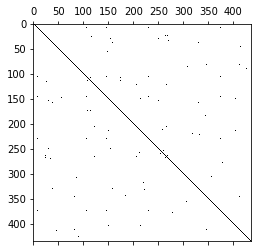

In [32]:
# compute the weight matrix W for the vertices of our graph 

def eta(tt, rr):

 val = np.exp( - (tt**2)/(2*rr**2) ) 
  
 return val.astype(float)
  
import scipy.spatial 

dist = scipy.spatial.distance_matrix(X, X, p = 2)

r = 0.2

W = eta(dist, r)

plt.spy(W>=0.01)

In [33]:
# compute Laplacian matrices 

d = np.sum(W, axis=1) # degree vector

D = np.diag(d)
Ds = np.diag(1/np.sqrt(d))
Di = np.diag(1/d)


L = D - W # unnormalized

Ln = np.dot(Ds, np.dot((D - W),Ds)) # normalized

In [34]:
# compute eigendecompositions 

ll, VV = np.linalg.eigh(L)

# we need to sort the eigenvalues and vectors 

idx = ll.argsort()
l = ll[idx]
V = VV[:, idx]

lln, VVn = np.linalg.eigh(Ln)

idxn = lln.argsort()
ln = lln[idxn]
Vn = VVn[:, idxn]

q1 = np.sign(V[:,1])
print(q1)

[ 0. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
 -1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.
  1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.
  1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1.
 -1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1.
  1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1.  1.
  1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1.
  1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1.
  1. -1.  1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1

Text(0.5, 1.0, 'Input (Unlabelled) data')

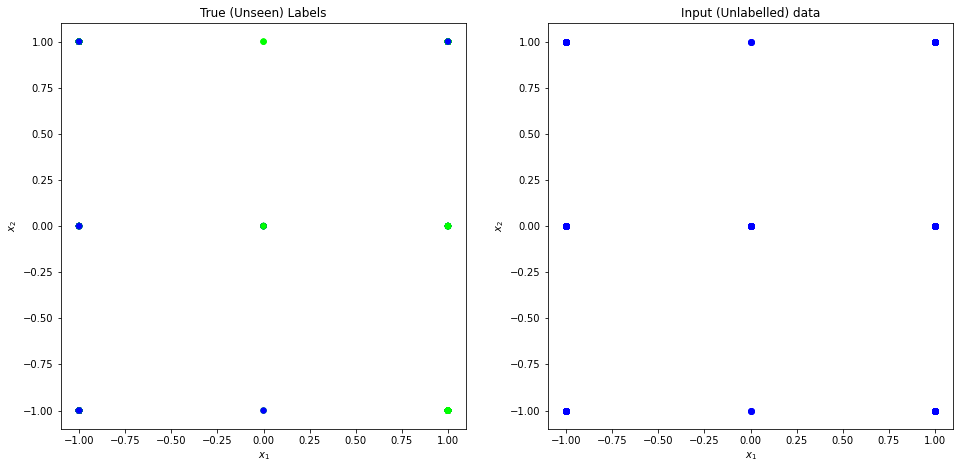

In [35]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], color='b')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Input (Unlabelled) data')

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 16).

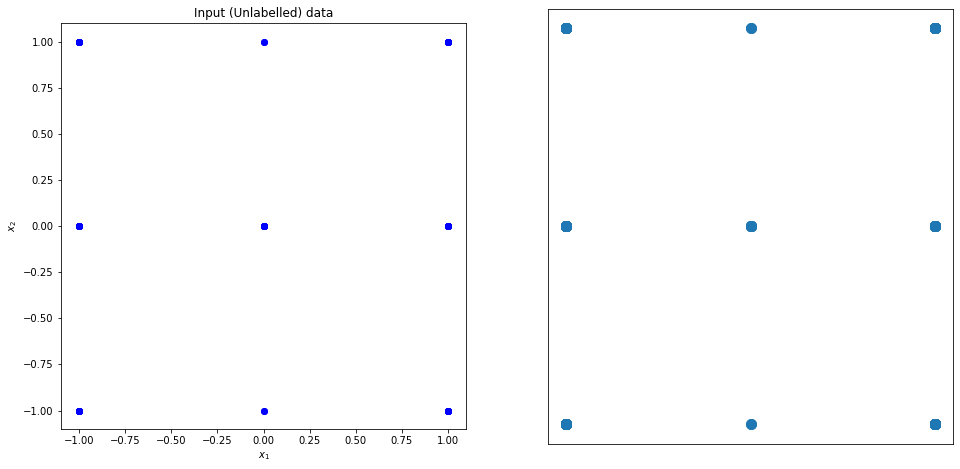

In [36]:
# visualize the graph using NetworkX

import networkx as nx

G = nx.Graph()
N = len(X)
for i in range(N):
  for j in range(N):
    if i != j and W[i,j] != 0 :
      G.add_edge(i, j, weight=W[i,j])

fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], color='b')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('Input (Unlabelled) data')


nx.draw_networkx_nodes(G, X, node_size=100, ax = ax[1])
nx.draw_networkx_edges(G, X, ax = ax[1])
ax[1].set_aspect('equal')
ax[1].set_title('Proximity Graph')